In [27]:
!pip install pandas matplotlib folium



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

In [29]:
data = pd.read_csv('spain_club_data.csv')
data.head()

,club,stadium_name,city,stadium_capacity,latitude,longitude,match_played,win,draw,loss,table_position,goal_scored,goals_against,goal_differences,points,number_of_fans,official_jersey_sponsor
0,Real Madrid,Santiago Bernabey Stadium,Madrid,85000,40.45321,-3.368820,38,26,8,4,1,80,31,49,86,350000000.0,Adidas
1,FC Barcelona,Spotify Camp Nou,Barcelona,100000,41.38106,2.122880,38,21,10,7,2,68,38,30,73,310000000.0,Nike
2,Atletico Madrid,Civitas Metropolitan Stadium,Madrid,45000,40.43625,-3.599520,38,23,8,7,3,65,43,22,71,3500000.0,Nike
3,Sevilla,Ramon Sanchez-Pizajuan Stadium,Sevilla,50000,37.38424,-5.971007,38,18,16,4,4,53,30,23,70,700000.0,Degiro
4,Real Betis,Benito Villamarin Stadium,Sevilla,53289,37.35667,-5.981720,38,19,8,11,5,62,40,22,65,500000.8,Hummel



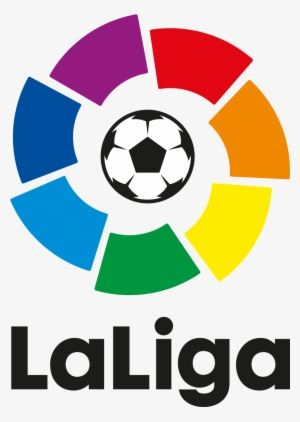
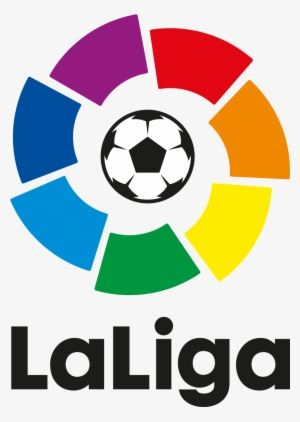
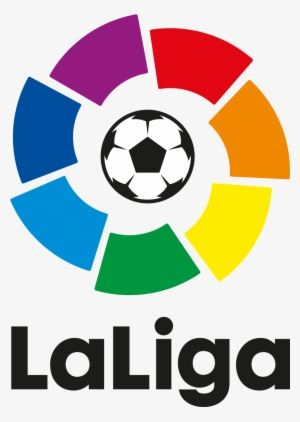
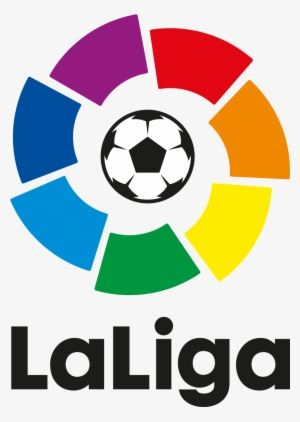
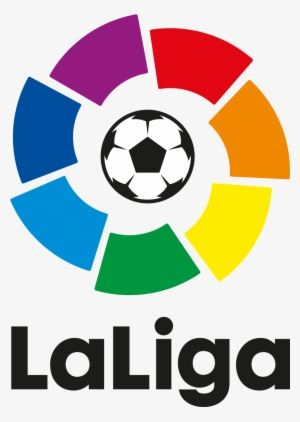
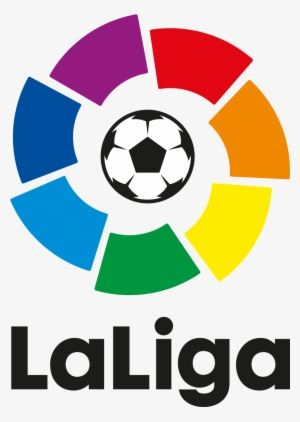
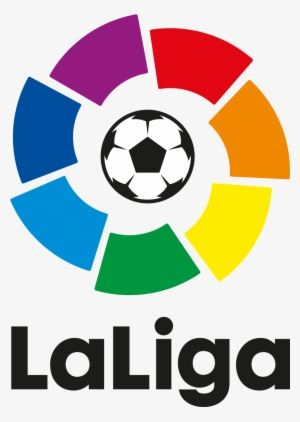
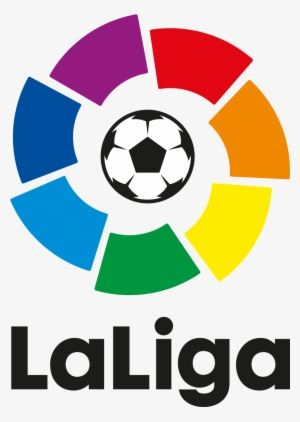
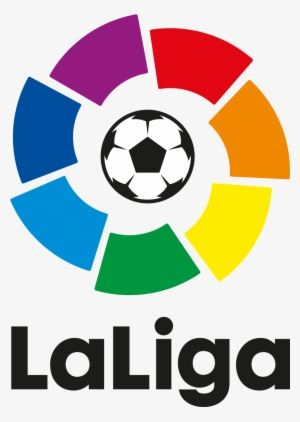
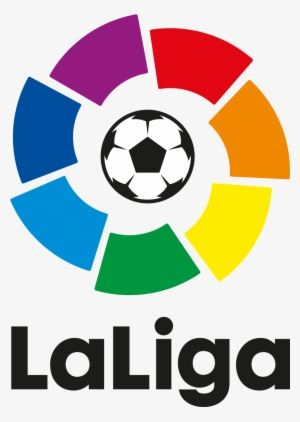
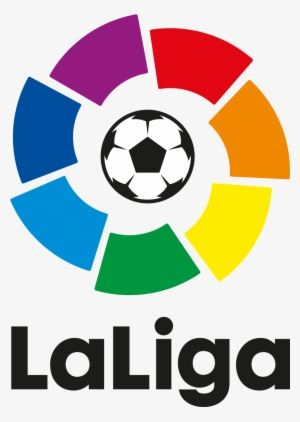
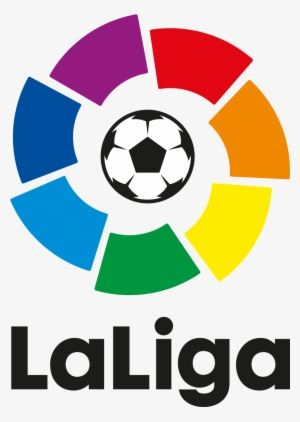
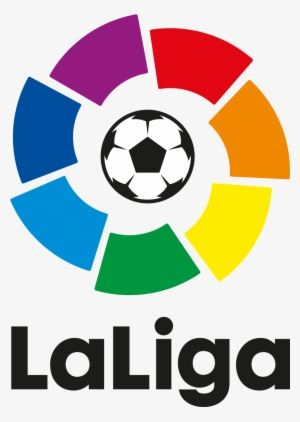
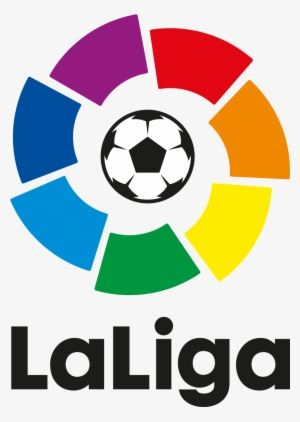
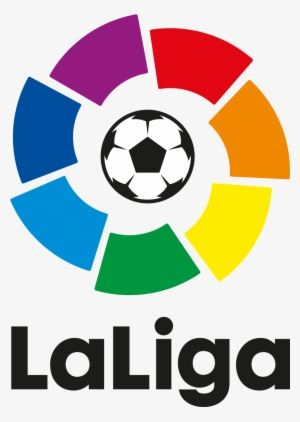
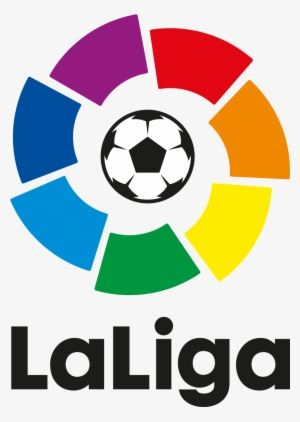
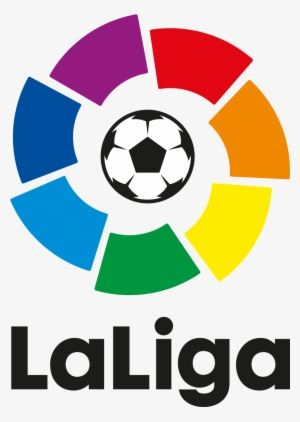
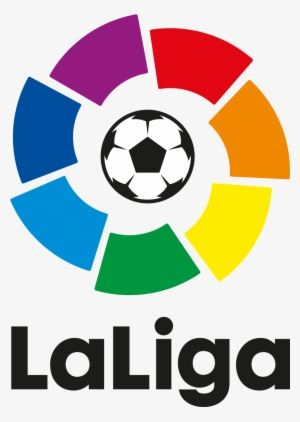
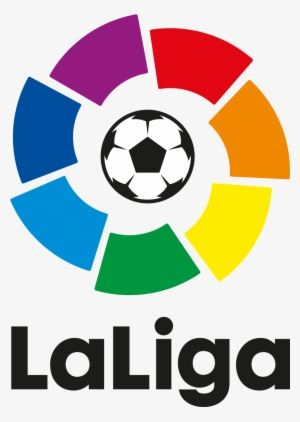
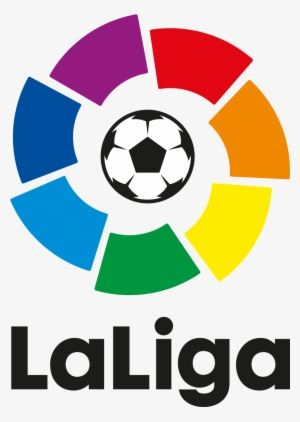

In [30]:
latitude = 40.4637
longitude = -3.7492


m = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='OpenStreetMap')
for index, row in data.iterrows():
    location = [row['latitude'], row['longitude']]
    icon = folium.CustomIcon(
        icon_image='laliga.png',  
        icon_size=(45, 70)  
    )
    tooltip_content = f"Club: {row['club']}<br>Stadium Capacity: {row['stadium_capacity']}"
    
    folium.Marker(
        location=location,
        icon=icon,
        tooltip=tooltip_content
    ).add_to(m)

display(m)



In [31]:
latitude = 40.4637
longitude = -3.7492


m = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='OpenStreetMap')

In [32]:
coordinates = []

In [33]:
for index, row in data.iterrows():
    location = [row['latitude'], row['longitude']]
    icon = folium.CustomIcon(
        icon_image='laliga.png',  
        icon_size=(45, 70)  
    )
    tooltip_content = f"Club: {row['club']}<br>Stadium Capacity: {row['stadium_capacity']}"
    
    folium.Marker(
        location=location,
        icon=icon,
        tooltip=tooltip_content
    ).add_to(m)

In [34]:
for index, row in data.iterrows():
    coordinates.append([row['latitude'], row['longitude']])



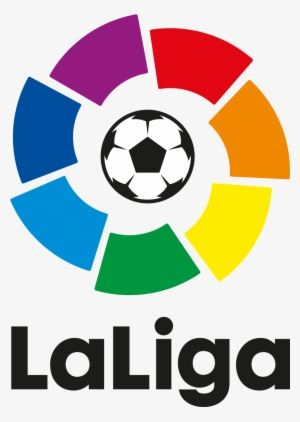
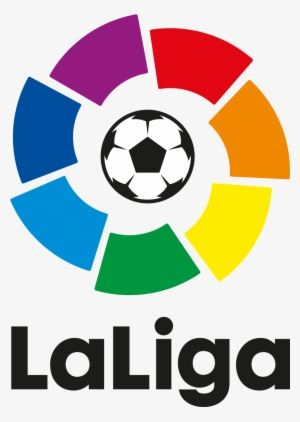
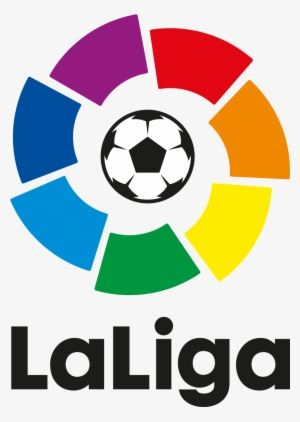
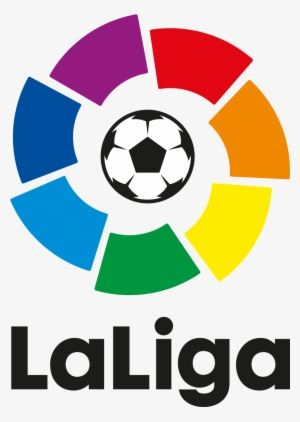
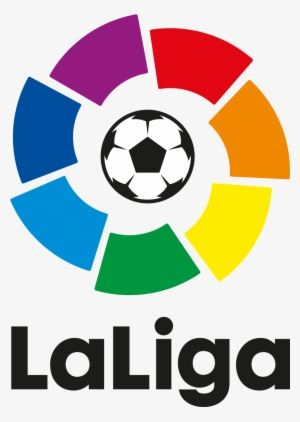
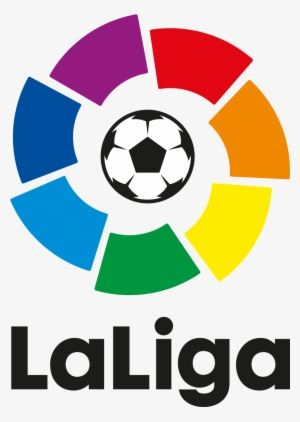
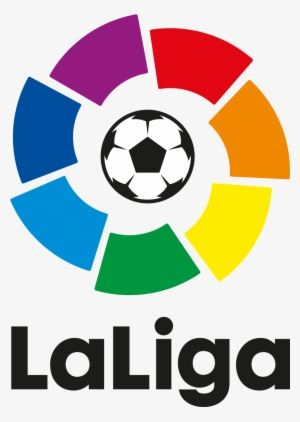
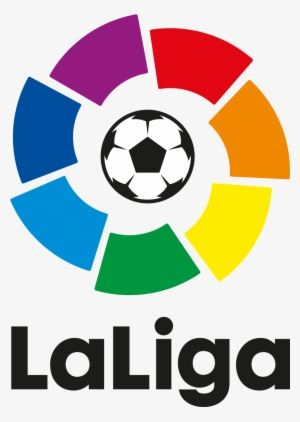
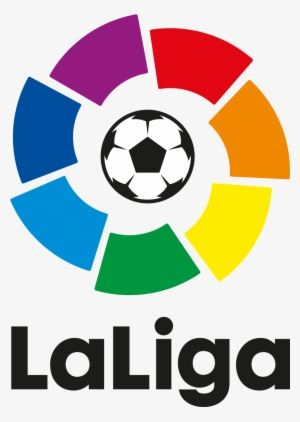
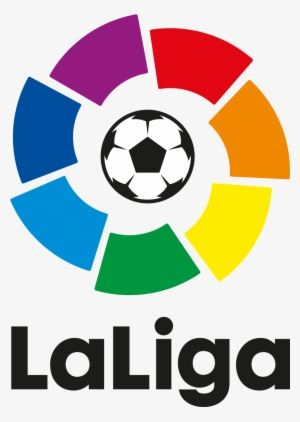
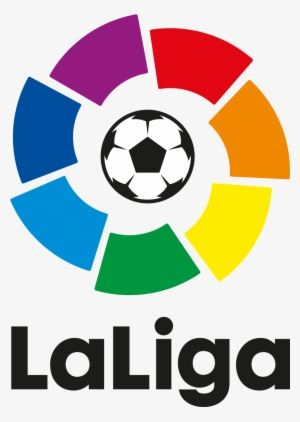
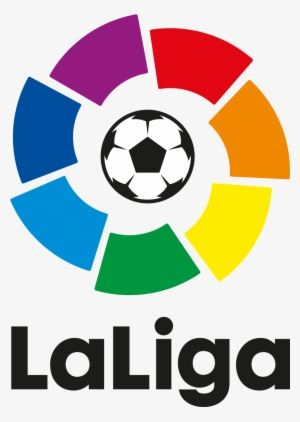
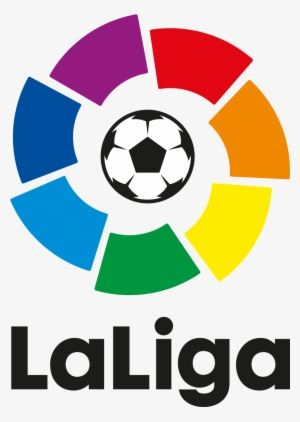
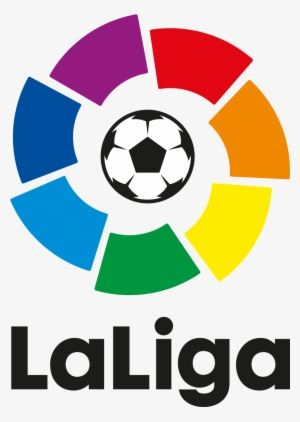
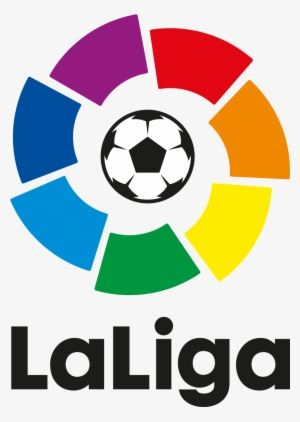
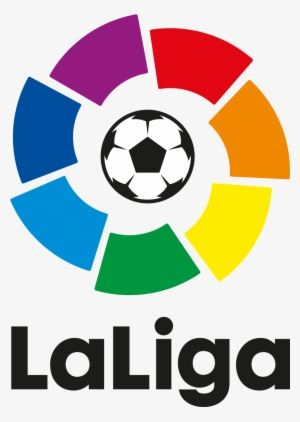
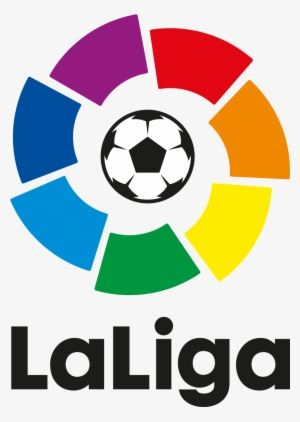
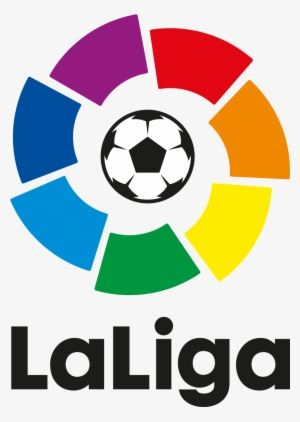
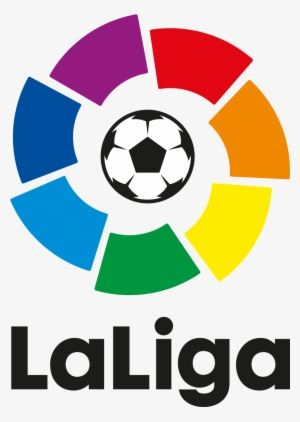
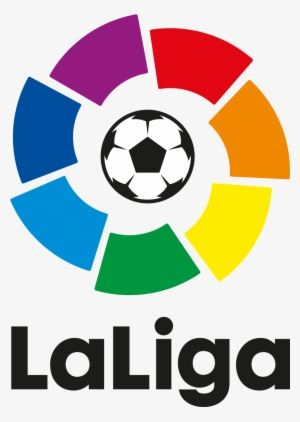

In [35]:


folium.PolyLine(
        locations=coordinates,
        color="blue",  
        weight=4,       
        popup="Airport Connectivity",
        ).add_to(m)
display(m)


m.save('map.html')

In [36]:

from folium.plugins import HeatMap


m = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='CartoDB dark_matter')  


data = pd.read_csv('spain_club_data.csv')  
for index, row in data.iterrows():
    location = [row['latitude'], row['longitude']]
   
    
    tooltip_content = f"Club: {row['club']}<br>Stadium Capacity: {row['stadium_capacity']}"

    
    folium.Marker(
        location=location,
        tooltip=tooltip_content
    ).add_to(m)

heatmap_data = data[['latitude', 'longitude', 'number_of_fans']].values.tolist()


HeatMap(heatmap_data, radius=15).add_to(m)

display(m)




m.save('fans_heatmap.html')


In [37]:
total_fans = data['number_of_fans'].sum()


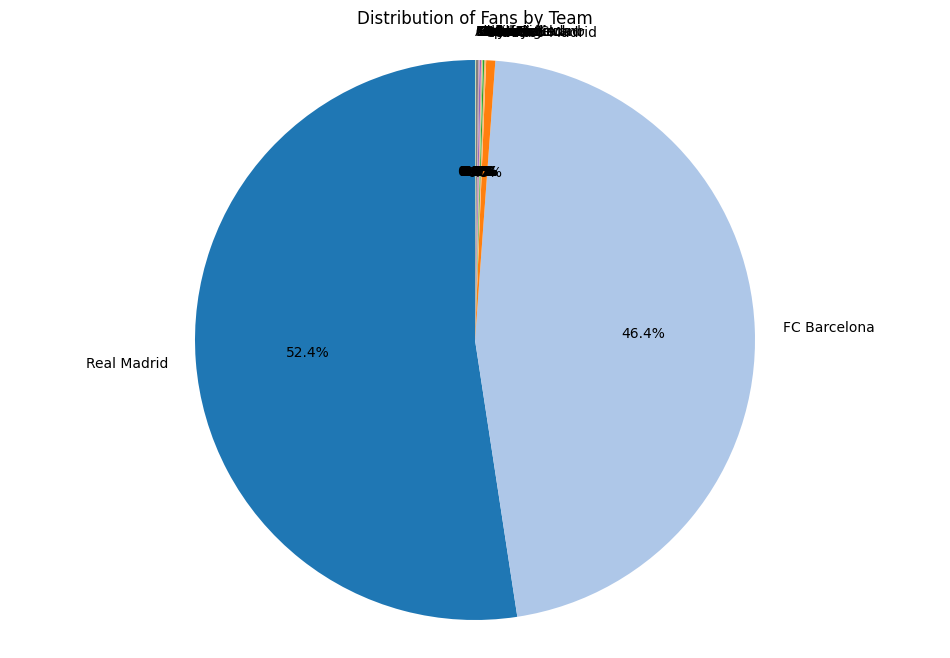

In [38]:
def clean_and_convert(value):
    if isinstance(value, str): 
        value = value.lower().replace("milliom", "million").replace("milllion", "million")
        value = value.replace("million", "").strip()
        try:
            return float(value) * 1e6
        except ValueError:
            return None
    elif isinstance(value, (int, float)):  
        return value
    else:  
        return None


data['number_of_fans'] = data['number_of_fans'].apply(clean_and_convert)


data = data.dropna(subset=['number_of_fans'])


colors = plt.cm.tab20(range(20))


plt.figure(figsize=(12, 8))
plt.pie(data['number_of_fans'], labels=data['club'], colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  
plt.title('Distribution of Fans by Team')
plt.show()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display


club_data = pd.read_csv('spain_club_data.csv')


def clean_and_convert(value):
    if isinstance(value, str):
        value = value.lower().replace("milliom", "million").replace("milllion", "million")
        value = value.replace("million", "").strip()
        try:
            return float(value) * 1e6
        except ValueError:
            return None
    elif isinstance(value, (int, float)):
        return value
    else:
        return None


club_data['number_of_fans'] = club_data['number_of_fans'].apply(clean_and_convert)

def create_pie_chart(selected_clubs):
    if selected_clubs and selected_clubs != ['Select Clubs']:
        selected_data = club_data[club_data['club'].isin(selected_clubs)]
        
        if not selected_data.empty:
            colors = plt.cm.tab20(range(len(selected_data)))
            plt.figure(figsize=(6, 6))
            plt.pie(selected_data['number_of_fans'], labels=selected_data['club'], colors=colors, autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
            plt.title('Distribution of Fans by Team')
            plt.show()
        else:
            print("No data available for the selected clubs.")
    else:
        print("Please select one or more clubs.")


club_selector = widgets.SelectMultiple(
    options=['Select Clubs'] + club_data['club'].tolist(),  # Use club names from 'spain_club_data.csv'
    description='Select Clubs:',
)


widgets.interactive(create_pie_chart, selected_clubs=club_selector)


interactive(children=(SelectMultiple(description='Select Clubs:', options=('Select Clubs', 'Real Madrid', 'FC …

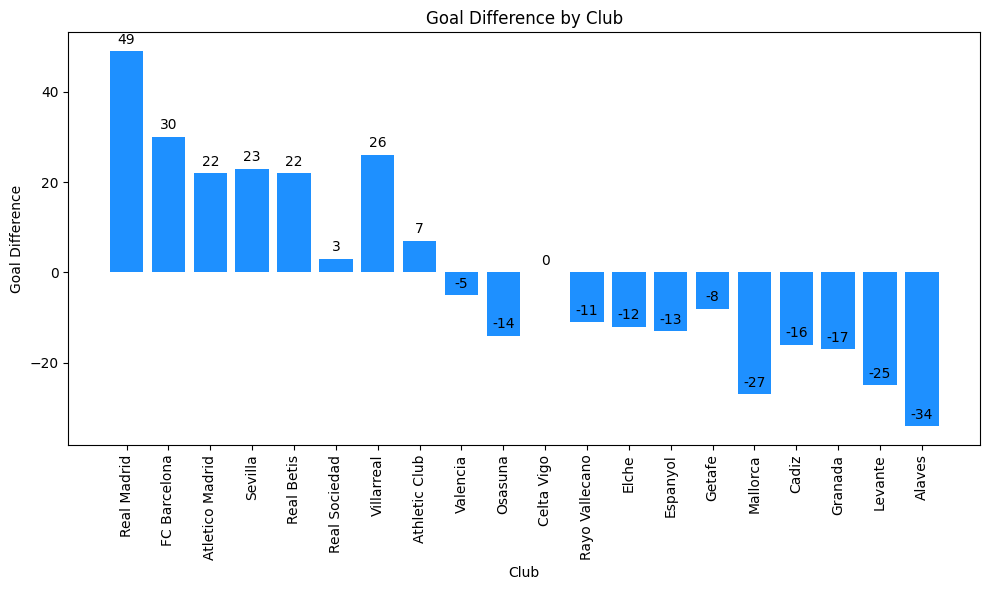

In [40]:
data = pd.read_csv('spain_club_data.csv')  


clubs = data['club']
goal_differences = data['goal_differences']


plt.figure(figsize=(10, 6))  


bars = plt.bar(clubs, goal_differences, color='dodgerblue')


plt.xticks(rotation=90, fontsize=10)


plt.title('Goal Difference by Club')
plt.xlabel('Club')
plt.ylabel('Goal Difference')


for bar, goal_diff in zip(bars, goal_differences):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(goal_diff), ha='center', va='bottom')
plt.tight_layout()
plt.show()


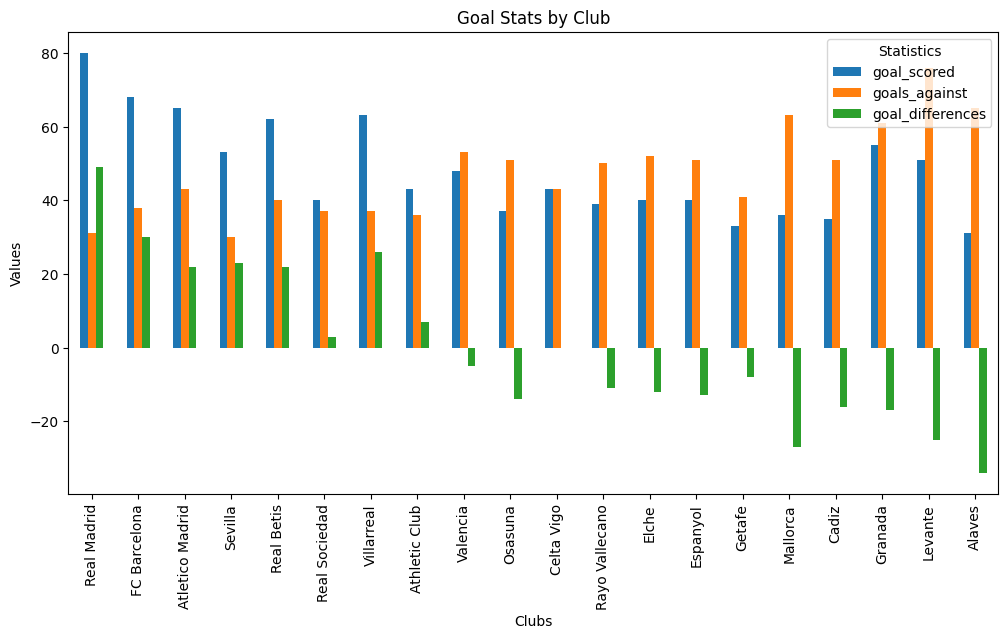

In [41]:
club_data = pd.read_csv('spain_club_data.csv')
data = club_data[['club', 'goal_scored', 'goals_against', 'goal_differences']]
data.set_index('club').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Clubs')
plt.ylabel('Values')
plt.title('Goal Stats by Club')
plt.legend(title='Statistics', loc='upper right')
plt.show()


In [42]:
club_data = pd.read_csv('spain_club_data.csv')

def create_bar_diagram(selected_club):
    if selected_club:
        club_stats = club_data[club_data['club'] == selected_club]
        if not club_stats.empty:
            club_stats = club_stats[['goal_scored', 'goals_against', 'goal_differences']]
            club_stats.plot(kind='bar', figsize=(10, 6))
            plt.xlabel('Statistics')
            plt.ylabel('Values')
            plt.title(f'{selected_club} Goal Stats')
            plt.legend(title='Statistics', loc='upper right')
            plt.show()
        else:
            print("Club not found in the data.")
    else:
        print("Please select a club.")


club_selector = widgets.Dropdown(
    options=['Select a Club'] + club_data['club'].tolist(), 
    description='Select a Club:',
)

widgets.interactive(create_bar_diagram, selected_club=club_selector)

interactive(children=(Dropdown(description='Select a Club:', options=('Select a Club', 'Real Madrid', 'FC Barc…

In [43]:
import pandas as pd
from IPython.display import display, HTML
from ipywidgets import interact, widgets


spain_club_data = pd.read_csv('spain_club_data.csv')
def display_sponsor_data(selected_sponsor):
    if selected_sponsor:
        sponsor_data = spain_club_data[spain_club_data['official_jersey_sponsor'] == selected_sponsor]
        if not sponsor_data.empty:
            styled_table = sponsor_data[['club', 'points']].to_html(index=False, classes='custom-table')
            styled_table = styled_table.replace('<table border="1" class="dataframe custom-table">', '<table class="custom-table">')
            display(HTML(styled_table))
        else:
            print(f"No data available for '{selected_sponsor}'.")
    else:
        print("Please select an 'official_jersey_sponsor'.")
sponsor_selector = widgets.Dropdown(
    options=['Select an Official Jersey Sponsor'] + spain_club_data['official_jersey_sponsor'].unique().tolist(),
    description='Select an Official Jersey Sponsor:',
)


widgets.interactive(display_sponsor_data, selected_sponsor=sponsor_selector)


interactive(children=(Dropdown(description='Select an Official Jersey Sponsor:', options=('Select an Official …

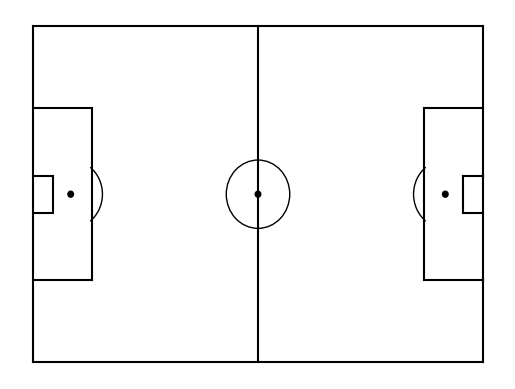

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_pitch():
    # Create figure
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Pitch Outline & Centre Line
    plt.plot([0, 0], [0, 90], color="black")
    plt.plot([0, 130], [90, 90], color="black")
    plt.plot([130, 130], [90, 0], color="black")
    plt.plot([130, 0], [0, 0], color="black")
    plt.plot([65, 65], [0, 90], color="black")

    # Left Penalty Area
    plt.plot([17, 17], [22, 68], color="black")
    plt.plot([0, 17], [68, 68], color="black")
    plt.plot([17, 0], [22, 22], color="black")

    # Right Penalty Area
    plt.plot([130, 113], [68, 68], color="black")
    plt.plot([113, 113], [68, 22], color="black")
    plt.plot([113, 130], [22, 22], color="black")

    # Left 6-yard Box
    plt.plot([0, 6], [40, 40], color="black")
    plt.plot([6, 6], [40, 50], color="black")
    plt.plot([6, 0], [50, 50], color="black")

    # Right 6-yard Box
    plt.plot([130, 124], [40, 40], color="black")
    plt.plot([124, 124], [40, 50], color="black")
    plt.plot([124, 130], [50, 50], color="black")

    # Prepare Circles; 10 yard circle at centre and 1 yard circle at penalty spot
    centreCircle = plt.Circle((65, 45), 9.15, color="black", fill=False)
    centreSpot = plt.Circle((65, 45), 0.8, color="black")
    leftPenSpot = plt.Circle((11, 45), 0.8, color="black")
    rightPenSpot = plt.Circle((119, 45), 0.8, color="black")

    # Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    # Prepare Arcs
    leftArc = patches.Arc((11, 45), height=18.3, width=18.3, angle=0, theta1=308, theta2=52, color="black")
    rightArc = patches.Arc((119, 45), height=18.3, width=18.3, angle=0, theta1=128, theta2=232, color="black")

    # Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    # Tidy Axes
    plt.axis('off')

    return fig, ax

fig, ax = draw_pitch()
plt.show()


In [45]:
import pandas as pd
data2 = pd.read_csv('Players State.csv')
data2.head()

,Player,Pos,Club,Age,Born,MP,Starts,Min,90s,Gls,...,GlsA,AstA,G+AA,G-PKA,G+A-PK,xGA,xAG.1,xGA+XAG,npxG.1,npxG+xAG.1
0,Luis Abram,DF,Granada,25,1996,8,6,560,6.2,0,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.05,0.05
1,Marcos Acuña,DF,Sevilla,29,1991,31,26,"2,260",25.1,1,...,0.04,0.12,0.16,0.04,0.16,0.05,0.11,0.16,0.05,0.16
2,Martin Agirregabiria,DF,Alaves,25,1996,24,17,"1,616",18.0,0,...,0.00,0.06,0.06,0.00,0.06,0.01,0.04,0.05,0.01,0.05
3,Julen Agirrezabala,GK,Athletic Club,20,2000,4,4,360,4.0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Sergio Agüero,FW,Barcelona,33,1988,4,2,151,1.7,1,...,0.60,0.00,0.60,0.60,0.60,0.61,0.07,0.68,0.61,0.68


In [46]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
